In [166]:
import sys
sys.path.append("../")
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np




def clean():

    df1 = pd.read_csv("electronic_police_report_2018.csv")
    df2 = pd.read_csv("electronic_police_report_2019.csv")
    df3 = pd.read_csv("electronic_police_report_2020.csv")
    df4 = pd.read_csv("electronic_police_report_2021.csv")
    df5 = pd.read_csv("electronic_police_report_2022.csv")
    
    dfs = [df1, df2, df3, df4, df5]

    dfa = pd.concat(dfs, join="outer")
    
    dfb = pd.read_csv("rtcc.csv", encoding="cp1252").rename(columns={"Item_number": "item_number"})
    
    df = pd.merge(dfa, dfb, on="item_number")

    df.loc[:, "year"] = df.year.astype(str).str.replace(r"^2022$", "", regex=True)




    # review district
   
    # print(df.groupby(["offenderstatus", "district"]).offender_race.value_counts())
    return df[~(df.year == "")]

In [167]:

def graph():
    df = clean()
  
    # filter to only arrests 
    # df = df[df.offenderstatus == "ARRESTED"]

    # consolidate non-black races 
    df.loc[:, "offender_race"] = df.offender_race.fillna("").str.lower().str.strip()\
        .str.replace("unknown", "non-black", regex=False)\
        .str.replace("hispanic", "non-black", regex=False)\
        .str.replace("asian", "non-black", regex=False)\
        .str.replace("white", "non-black", regex=False)\
        .str.replace(r"amer\. ind\.", "non-black", regex=True)
    df = df[~((df.offender_race == ""))]

    ## bar 1
    # df = df[(df.offender_race.isin(["black", "non-black"]))]
    # experiment = df.groupby(["district"]).offender_race.value_counts(normalize=True)
    # experiment.plot(kind="bar")
    
    ## bar 2
    # df = df[(df.offender_race.isin(["black", "non-black"]))]
    # df = df[df.offender_gender == "MALE"]
    # experiment = df.groupby(["district"]).offender_race.value_counts(normalize=True)
    # experiment.plot(kind="bar")

    ## line 1
    # df = df[df.offender_race == "black"]
    # experiment = df.groupby("year").offender_race.value_counts()
    # experiment.plot()



    experiment.plot()
    plt.xlabel("District + Race when 'offender_gender' == 'male'")
    plt.ylabel("Percent of Arrests")
    plt.show()
    return df 


C:\Users\ayyubi\AppData\Local\Temp/ipykernel_23484/2234158645.py:16: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = pd.read_csv("electronic_police_report_2021.csv")


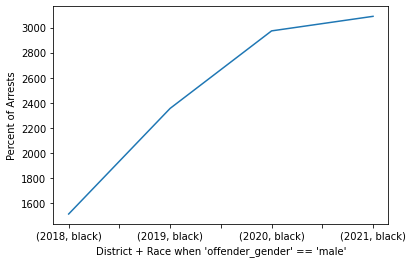

,item_number,district,location,disposition,signal_type,signal_description,occurred_date_time,charge_code,charge_description,offender_race,...,victim_age,victim_number,victim_fatal_status,hate_crime,report_type,year,offenderid,offenderstatus,persontype,Signal Code
0,D-20771-18,2,36XX S Roman St,CLOSED,30S,HOMICIDE (SHOOTING),2018-04-18 04:52:00,14 (27) 30.1,ATTEMPT - SECOND DEGREEMURDER,black,...,NaN,2.0,Non-fatal,NaN,Supplemental Report,2018,NaN,NaN,NaN,30s
1,D-20771-18,2,36XX S Roman St,CLOSED,30S,HOMICIDE (SHOOTING),2018-04-18 04:52:00,14 30.1,SECOND DEGREE MURDER,black,...,NaN,1.0,Fatal,NaN,Supplemental Report,2018,NaN,NaN,NaN,30s
8,G-35522-18,3,Metairie Rd & City Park Av,CLOSED,34S,AGGRAVATED BATTERY (SHOOTING),2018-07-28 22:00:00,14 34.7,AGG. SECOND DEGREE BATTERY,black,...,44.0,1.0,Non-fatal,NaN,Supplemental Report,2018,NaN,NaN,NaN,34S
9,G-35522-18,3,Metairie Rd & City Park Av,CLOSED,34S,AGGRAVATED BATTERY (SHOOTING),2018-07-28 22:00:00,NaN,NaN,black,...,43.0,2.0,Non-fatal,NaN,Supplemental Report,2018,NaN,NaN,NaN,34S
11,E-14666-18,1,3XX N Tonti St,OPEN,64G,ARMED ROBBERY (GUN),2018-05-12 03:30:00,14 (24) 64,PRINCIPAL TO ARMED ROBBERY,black,...,26.0,1.0,Non-fatal,NaN,Incident Report,2018,NaN,NaN,NaN,64G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17629,D-36262-21,8,002XX Loyola Av,OPEN,65,SIMPLE ROBBERY,2021-04-27 04:00:00,14 65,SIMPLE ROBBERY,black,...,28.0,1.0,Non-fatal,NaN,Supplemental Report,2021,684043.0,NaN,VICTIM,65
17630,D-36262-21,8,002XX Loyola Av,OPEN,65,SIMPLE ROBBERY,2021-04-27 04:00:00,14 67.26,THEFT OF A MOTOR VEHICLE,black,...,28.0,1.0,Non-fatal,NaN,Supplemental Report,2021,684043.0,NaN,VICTIM,65
17631,D-36262-21,8,002XX Loyola Av,OPEN,65,SIMPLE ROBBERY,2021-04-27 04:00:00,NaN,NaN,black,...,27.0,2.0,Non-fatal,NaN,Supplemental Report,2021,684043.0,NaN,WITNESS,65
17632,G-20218-21,2,013XX S Genois St #B,CLOSED,34S,AGGRAVATED BATTERY (SHOOTING),2021-07-16 20:18:00,14 34,AGG. BATTERY,black,...,NaN,1.0,Non-fatal,NaN,Supplemental Report,2021,708939.0,ARRESTED,VICTIM,34-S


In [168]:
graph()